## Imports

In [48]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data reading

In [2]:
!unzip /kaggle/input/quora-question-pairs/train.csv.zip

Archive:  /kaggle/input/quora-question-pairs/train.csv.zip
  inflating: train.csv               


In [10]:
!unzip /kaggle/input/quora-question-pairs/test.csv.zip

Archive:  /kaggle/input/quora-question-pairs/test.csv.zip
  inflating: test.csv                


In [24]:
df = pd.read_csv("train.csv")
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
258696,258696,374322,265053,"I just passed the 12 grade, I want to become a...",I want to be a billionaire from an Internet st...,0
210741,210741,315381,315382,How is Kendall Jenner related to the Kardashians?,Are the Kardashian-Jenners slightly narcissistic?,0
2759,2759,5475,5476,"Which one is better: Quora, Stack Exchange or ...","How do I stop thinking about Quora, SMS, Stack...",0
328486,328486,455027,455028,How can a private company like reliance have m...,"Can a cap table be kept ""private"" from a share...",0
256777,256777,371970,371971,Who discovered peroxisomes? How was it discove...,How was hemoglobin discovered? Who discovered it?,0
44441,44441,79750,79751,How do I cook a perfect steak?,What is the best way to cook steak?,1
264164,264164,380867,380868,Does Cymalta (duloxetine) affect similar recep...,What should I take when opiates don't work?,0
65477,65477,113627,113628,Any idea of dresses for a special 15-year-old'...,Where can I find a dress I seen last night in ...,0
248022,248022,43595,57751,"Is vacuum energy infinite? If it is, how and w...",Will we get more and more dark energy and vacu...,1
169187,169187,261889,246465,What is the best way to study for C.A. exams?,How do I study for my exams?,0


## Data common features

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [26]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

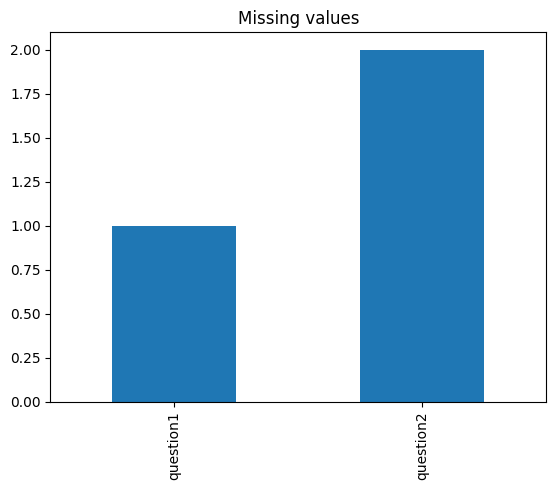

In [29]:
df[["question1", "question2"]].isnull().sum().plot(kind='bar', title='Missing values')
plt.savefig("missing_values.png")
plt.show()

In [31]:
df[df["question1"].isna()]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [32]:
df[df["question2"].isna()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [33]:
df.dropna(inplace=True)
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [34]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404287.000000,404287.000000,404287.000000,404287.000000
mean,202144.340337,217243.151093,220955.212082,0.369201
std,116708.673691,157751.614317,159903.168488,0.482589
min,0.000000,1.000000,2.000000,0.000000
25%,101071.500000,74436.500000,74726.500000,0.000000
50%,202145.000000,192181.000000,197053.000000,0.000000
75%,303216.500000,346573.000000,354692.000000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


## Distributions

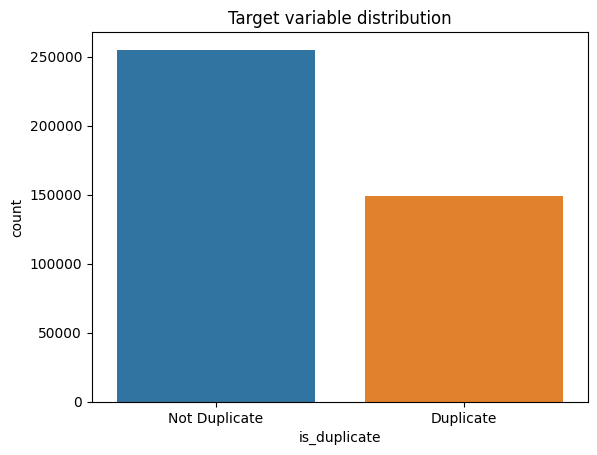

is_duplicate
0    63.079941
1    36.920059
Name: proportion, dtype: float64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_duplicate', data=df)
plt.title("Target variable distribution")
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.savefig("target_distribution.png")
plt.show()

print(df['is_duplicate'].value_counts(normalize=True) * 100)


In [23]:
questions = pd.Series(df['question1'].tolist() + df['question2'].tolist())
print("Unique questions:", questions.nunique(), "among", len(questions))

top_questions = questions.value_counts().head(10)
print()
print("Top 10 questions")
print(top_questions)

Unique questions: 537359 among 808574

Top 10 questions
What are the best ways to lose weight?                                                                161
How can you look at someone's private Instagram account without following them?                       120
How can I lose weight quickly?                                                                        111
What's the easiest way to make money online?                                                           88
Can you see who views your Instagram?                                                                  79
What are some things new employees should know going into their first day at AT&T?                     77
What do you think of the decision by the Indian Government to demonetize 500 and 1000 rupee notes?     68
Which is the best digital marketing course?                                                            66
How can you increase your height?                                                               

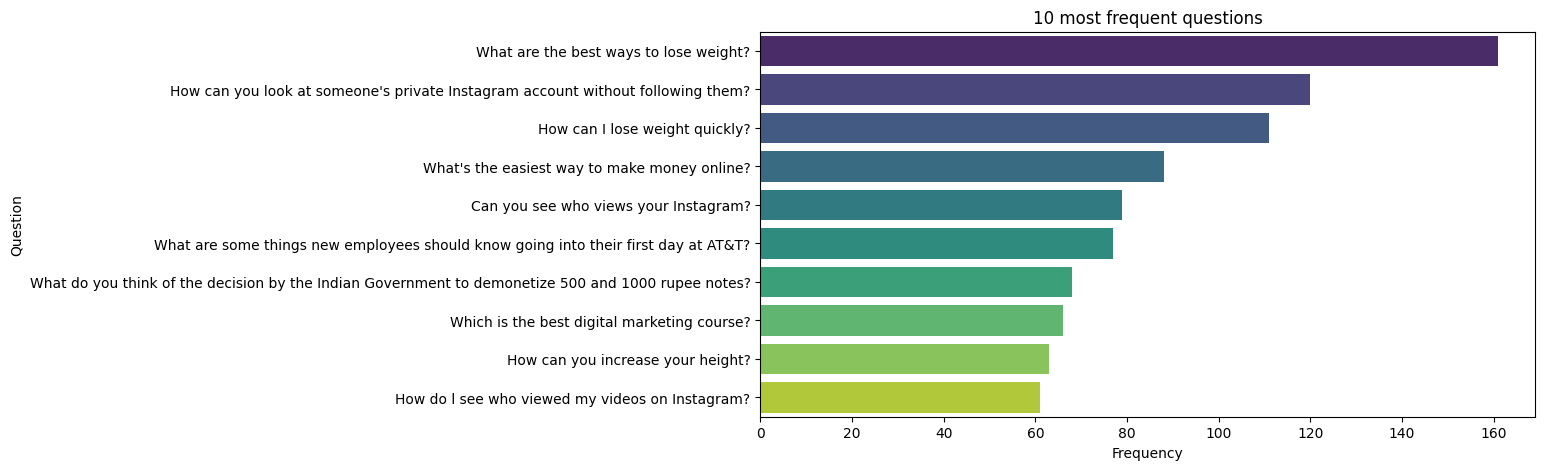

In [38]:
questions = pd.Series(df['question1'].tolist() + df['question2'].tolist())
top_q = questions.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_q.values, y=top_q.index, palette='viridis')
plt.title("10 most frequent questions")
plt.xlabel("Frequency")
plt.ylabel("Question")
plt.savefig("most_frequent_questions.png")
plt.show()


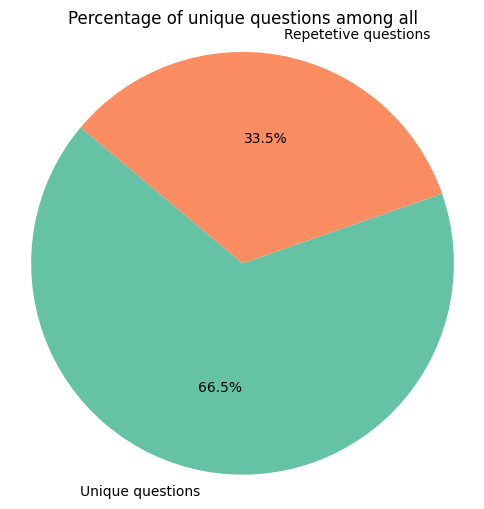

In [40]:
all_questions = pd.Series(df['question1'].tolist() + df['question2'].tolist())

unique_count = all_questions.nunique()
total_count = all_questions.shape[0]
duplicate_count = total_count - unique_count

labels = ['Unique questions', 'Repetetive questions']
sizes = [unique_count, duplicate_count]
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title("Percentage of unique questions among all")
plt.axis('equal')
plt.savefig("unique_questions.png")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

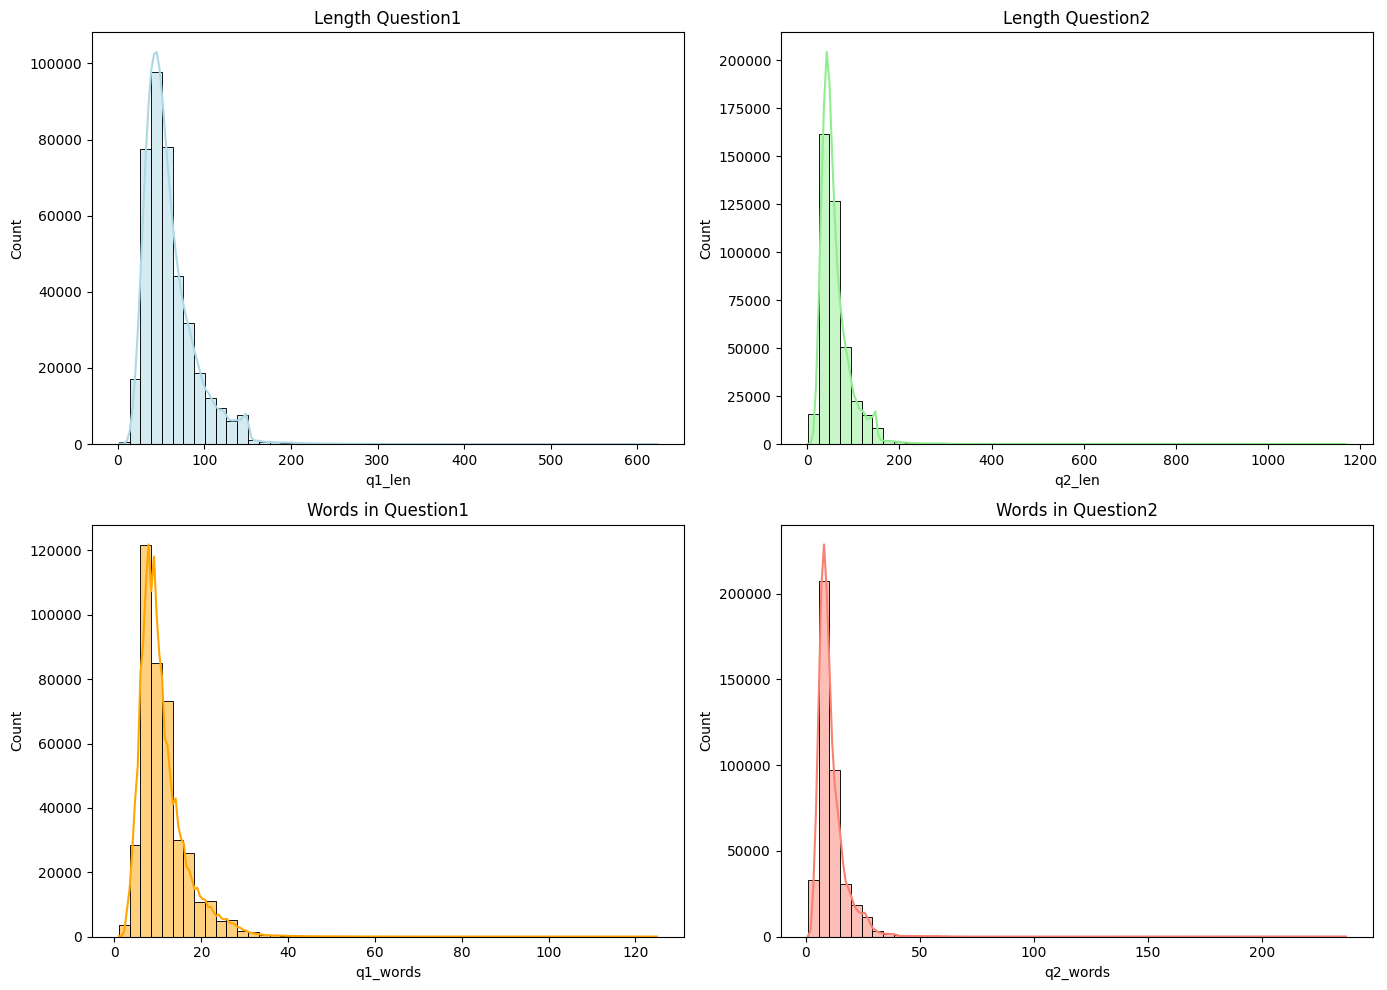

In [42]:
df['q1_len'] = df['question1'].astype(str).apply(len)
df['q2_len'] = df['question2'].astype(str).apply(len)
df['q1_words'] = df['question1'].astype(str).apply(lambda x: len(x.split()))
df['q2_words'] = df['question2'].astype(str).apply(lambda x: len(x.split()))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['q1_len'], bins=50, ax=axes[0][0], color='lightblue', kde=True)
axes[0][0].set_title("Length Question1")
sns.histplot(df['q2_len'], bins=50, ax=axes[0][1], color='lightgreen', kde=True)
axes[0][1].set_title("Length Question2")

sns.histplot(df['q1_words'], bins=50, ax=axes[1][0], color='orange', kde=True)
axes[1][0].set_title("Words in Question1")
sns.histplot(df['q2_words'], bins=50, ax=axes[1][1], color='salmon', kde=True)
axes[1][1].set_title("Words in Question2")

plt.tight_layout()
plt.savefig("words.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


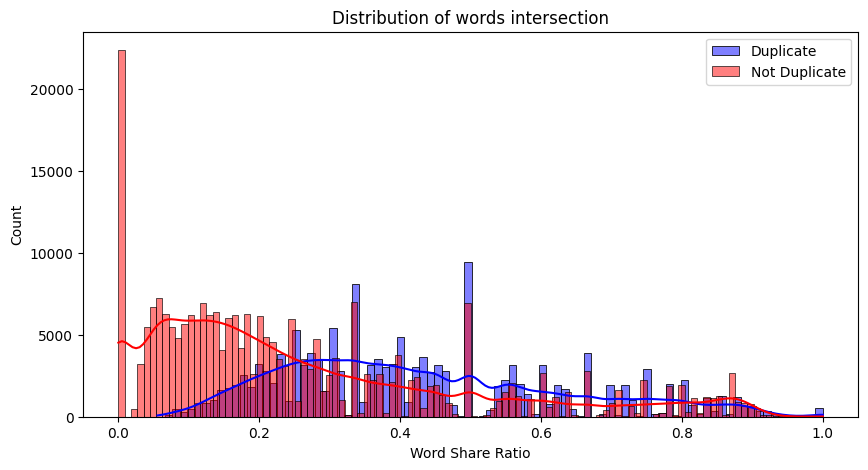

In [44]:
def word_overlap(row):
    q1 = set(str(row['question1']).lower().split())
    q2 = set(str(row['question2']).lower().split())
    return len(q1 & q2) / (len(q1 | q2) + 1e-6)

df['word_share'] = df.apply(word_overlap, axis=1)

plt.figure(figsize=(10, 5))
sns.histplot(df[df['is_duplicate'] == 1]['word_share'], label='Duplicate', color='blue', kde=True)
sns.histplot(df[df['is_duplicate'] == 0]['word_share'], label='Not Duplicate', color='red', kde=True)
plt.title("Distribution of words intersection")
plt.xlabel("Word Share Ratio")
plt.legend()
plt.savefig("intersection.png")
plt.show()


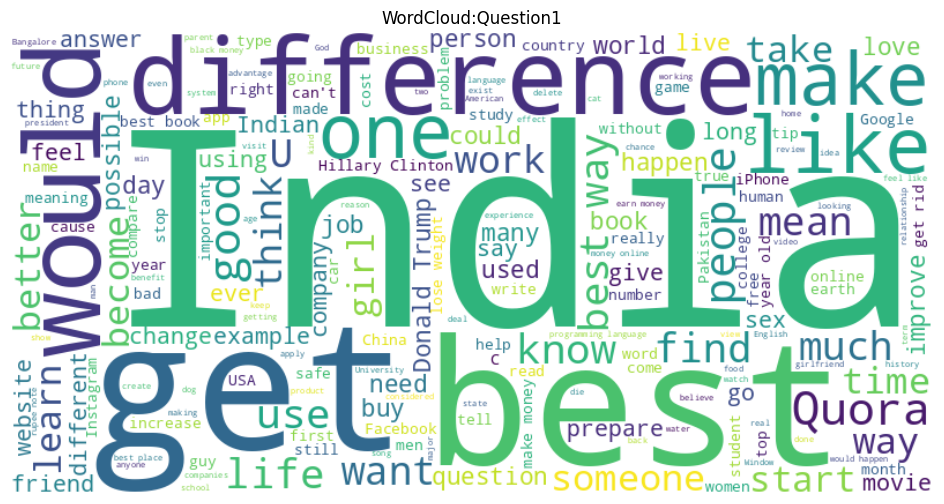

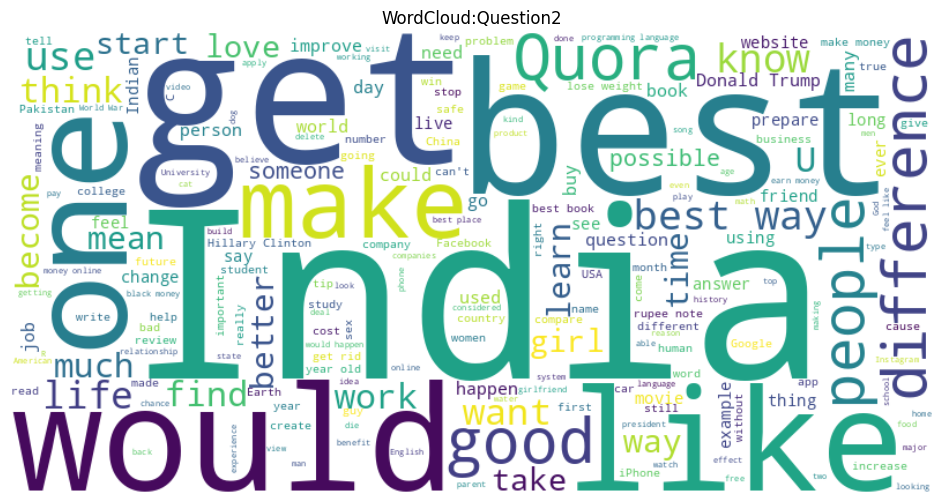

In [50]:
stop_words = set(stopwords.words("english"))

def draw_wordcloud(text_series, title):
    text = ' '.join(text_series.dropna().astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(title.lower() + ".png")
    plt.show()

draw_wordcloud(df['question1'], "WordCloud:Question1")
draw_wordcloud(df['question2'], "WordCloud:Question2")

In [54]:
print("Примеры дубликатов:")
print(df[df['is_duplicate'] == 1][['question1', 'question2']].sample(5))

print("\nПримеры недубликатов:")
print(df[df['is_duplicate'] == 0][['question1', 'question2']].sample(5))

Примеры дубликатов:
                                                question1  \
399580                           Can I earn money online?   
321249  What can I do to make car rides more comfortab...   
107898  What is the best method to compare and contras...   
319279                   How many people have ever lived?   
112656               How should I prepare for cgl tier 3?   

                                                question2  
399580        How can I earn money online from home only?  
321249  How can I keep my cat comfortable on a long ca...  
107898  What are the similarities and differences betw...  
319279             How many human beings have ever lived?  
112656  What are the best books to prepare for SSC CGL...  

Примеры недубликатов:
                                                question1  \
39071   What is the one thing you wished you wouldn't ...   
207384  What are some good colleges to do a BE in Karn...   
236731   What should I do to improve my English

## Conclusion

- Class Imbalance

The dataset is imbalanced: about 63% of question pairs are not duplicates, and 37% are duplicates.

This needs to be addressed during model training (e.g., with class weighting or resampling).

- Repetition of Questions

Many questions appear multiple times across different pairs.

A large portion of question pairs include frequently asked or popular questions, making some duplicates easier to detect.

- Text Length Distribution

Most questions are between 40–100 characters long.

The number of words per question typically ranges from 5 to 15 words.

Length distributions for question1 and question2 are very similar, which supports the dataset balance in terms of textual complexity.

- Word Overlap Between Pairs

Duplicate questions tend to have a higher word overlap ratio than non-duplicates.

This suggests that shared vocabulary is a useful signal for detecting duplicates.

- Word Clouds

Common words include generic interrogative terms like: what, how, do, is, etc.

- Unique vs. Repeated Questions

Only about 60–70% of all questions are unique; the rest are repeated in different pairs.

This reinforces the idea that the dataset contains many reformulations of similar questions.

---

Dataset Quality

Some questions are incomplete or noisy (e.g., typos, partial phrases), which may require preprocessing or cleaning before training a model.